<a href="https://colab.research.google.com/github/kamadomin/PyTorchLearning/blob/main/Simple_NN_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Create a Model (or it can be Ne or any name) Class that inherits nn.Module
# Define the Model class that inherits from nn.Module
class Model(nn.Module):
    # Initialize the model layers
    def __init__(self, in_features=4, h1=8, h2=9, output_features=3):
        super().__init__()  # Corrected with parentheses to initialize the nn.Module
        super().__init__()        #super ensuueres that Model behaves like it's parent class to nn.Module (ot instantiates it)
      # Define the three linear layers
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, output_features)

    def forward(self, x):   #describes what happens to the inout when is passed to the model
          # Pass x through linear layers adding activations
        x = nn.F.relu(self.fc1(x))
        x = nn.F.relu(self.fc2(x)) #Rectified Linear Unit when the output is less than 0 use 0 or when is more than zero use that number
        x= self.out(x)

        return x


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Model class that inherits from nn.Module
class Model(nn.Module):
    # Initialize the model layers
    def __init__(self, in_features=4, h1=8, h2=9, output_features=3):
        super().__init__()  # Corrected with parentheses to initialize the nn.Module

        # Define the three linear layers
        self.fc1 = nn.Linear(in_features, h1)      # Input layer to first hidden layer
        self.fc2 = nn.Linear(h1, h2)               # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(h2, output_features)  # Second hidden layer to output layer

    # Define the forward pass
    def forward(self, x):
        # Pass x through linear layers with activations
        x = F.relu(self.fc1(x))    # First hidden layer with ReLU activation
        x = F.relu(self.fc2(x))    # Second hidden layer with ReLU activation
        x = self.fc3(x)            # Output layer

        return x


In [5]:
torch.manual_seed(42)
model=Model()

In [6]:
import matplotlib.pyplot as plt
#%matplotlib inline #in jupyter notebooks

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Convert to a DataFrame for easier handling
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target  # Adding the target column

print(iris_df.iloc[70:,:])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
71                 6.1               2.8                4.0               1.3   
72                 6.3               2.5                4.9               1.5   
73                 6.1               2.8                4.7               1.2   
74                 6.4               2.9                4.3               1.3   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
70        1  

In [8]:
iris_df=iris_df.rename(columns={'sepal length (cm)': 'sepal.length'})

In [9]:
iris_df=iris_df.rename(columns= {'petal length (cm)':'petal.length','petal width (cm)':'petal.width','target':'variety'})

In [10]:
iris_df.head()

,sepal.length,sepal width (cm),petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#Train Test Split Set X,y

X = iris_df.drop('variety', axis=1)
y=iris_df['variety']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Convert to numpy

X=X.values
y=y.values

In [14]:
#X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2, random seed = 42)
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state = 41)#

In [15]:
# convert features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# covert y labels to long tesnors (because there are floats)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# set the criterion to measure the error; to see how far off the prediction we are from

criterion = nn. CrossEntropyLoss()

# choose Adam optimizer, lr - learning rate( if error after couple of iterations- epochs - doesnt deacrease we need lower lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

 It combines the best aspects of two other optimization algorithms: Stochastic Gradient Descent (SGD) and RMSprop

In [21]:
# train our model

#Epoch (one run through all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
  # go forward and get prediction
  y_pred = model.forward(X_train)

  #Measure the loss /error, gonna be high at first

  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  # keep Track on our losses

  losses.append(loss.detach().numpy())

  # print every 10th epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss{loss}')

  # DO some back propagation: take the error rate from forward propagation and feed it back  through the network  to fine tune the weights
  optimizer.zero_grad() # Clears the old gradient values, ensuring gradients from the previous iterations don’t accumulate.
  loss.backward() # Performs backpropagation to calculate the new gradients of the loss with respect to each parameter (weights).
  optimizer.step() # Uses the calculated gradients to update the model's parameters, moving them toward values that minimize the los

Epoch: 0 and loss1.0935293436050415
Epoch: 10 and loss0.9156933426856995
Epoch: 20 and loss0.7563302516937256
Epoch: 30 and loss0.6106743216514587
Epoch: 40 and loss0.4407137632369995
Epoch: 50 and loss0.2712990641593933
Epoch: 60 and loss0.15888482332229614
Epoch: 70 and loss0.09664525091648102
Epoch: 80 and loss0.0672047957777977
Epoch: 90 and loss0.052712492644786835


loss: This is a PyTorch tensor that represents the calculated loss for a specific batch of data. It's a numerical value that indicates how well the model is performing.

loss.detach():

Detaching: This operation disconnects the tensor from the computation graph. It prevents PyTorch from tracking the gradient of loss during backpropagation.
Why Detach? By detaching, we're ensuring that the loss value is treated as a simple NumPy array, without any computational graph dependencies. This is necessary because we want to store the loss value for later analysis or visualization, but we don't need to backpropagate through it.
loss.detach().numpy():

Converting to NumPy: This converts the detached PyTorch tensor into a NumPy array. NumPy arrays are more compatible with various Python libraries and tools for data analysis and visualization.

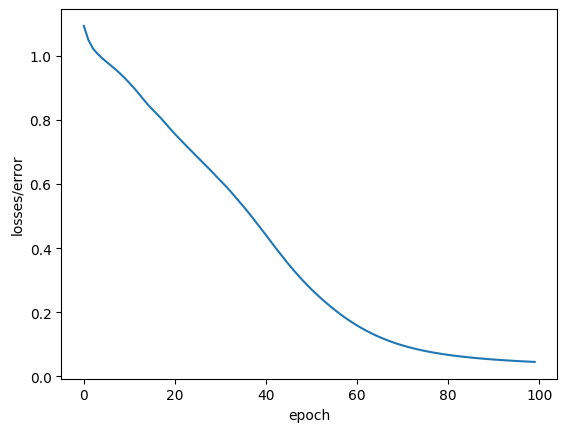

In [25]:
#plt.plot(range(epochs,losses))
plt.plot(range(epochs), losses)
plt.ylabel('losses/error')
plt.xlabel('epoch')
plt.show()

In [28]:
# Eavluate the model on Test Data Set (validate the model on test set)

with torch.no_grad(): # Turns off back propagation
  y_eval=model.forward(X_test) # features from our tes set, and y_val -> predictions
  loss = criterion(y_eval,y_test) #we want to find loss/error


In [27]:
loss

tensor(0.1314)

In [ ]:
# as the result is not very great, lets dive deeper